In [460]:
# <!-- collapse=True -->
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=12)
plt.rc('axes', labelsize=12)

# Début de l'exploration des données "Ames Housing dataset"

voir la description des données sur [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

L'idée est de prédire la prix de vente des maisons, en fonction de l'ensemble des paramètres (~80).

### Chargement des données avec Pandas

In [368]:
import pandas as pd

In [463]:
df = pd.read_csv('./prices_train.csv')

SalePrice = df['SalePrice']
df = df.drop(['Id', 'SalePrice'], axis=1)

len( df.columns )

79

### Est-ce que les variables sont quantitatives ou bien qualitatives ? 

On cherche le nombre de valeurs uniques par variables

In [441]:
class_size = [ (c, len( df[c].unique() ) ) for c in df.columns ]
class_size.sort( key=lambda x:x[1] )

In [442]:
print( class_size )

[('Street', 2), ('Utilities', 2), ('CentralAir', 2), ('Alley', 3), ('LandSlope', 3), ('BsmtHalfBath', 3), ('HalfBath', 3), ('PavedDrive', 3), ('LotShape', 4), ('LandContour', 4), ('ExterQual', 4), ('BsmtFullBath', 4), ('FullBath', 4), ('KitchenAbvGr', 4), ('KitchenQual', 4), ('Fireplaces', 4), ('GarageFinish', 4), ('PoolQC', 4), ('MSZoning', 5), ('LotConfig', 5), ('BldgType', 5), ('MasVnrType', 5), ('ExterCond', 5), ('BsmtQual', 5), ('BsmtCond', 5), ('BsmtExposure', 5), ('HeatingQC', 5), ('GarageCars', 5), ('Fence', 5), ('MiscFeature', 5), ('YrSold', 5), ('RoofStyle', 6), ('Foundation', 6), ('Heating', 6), ('Electrical', 6), ('FireplaceQu', 6), ('GarageQual', 6), ('GarageCond', 6), ('SaleCondition', 6), ('BsmtFinType1', 7), ('BsmtFinType2', 7), ('Functional', 7), ('GarageType', 7), ('Condition2', 8), ('HouseStyle', 8), ('RoofMatl', 8), ('BedroomAbvGr', 8), ('PoolArea', 8), ('Condition1', 9), ('OverallCond', 9), ('SaleType', 9), ('OverallQual', 10), ('TotRmsAbvGrd', 12), ('MoSold', 12),

On peut regarder si ce sont des valeurs numériques, ou simplement des catégories:

In [443]:
for classname, k in class_size[:50]:
    print( '%s (%i): %s' % (classname , k, ' - '.join( [str(s) for s in df[classname].unique() ])) )

Street (2): Pave - Grvl
Utilities (2): AllPub - NoSeWa
CentralAir (2): Y - N
Alley (3): nan - Grvl - Pave
LandSlope (3): Gtl - Mod - Sev
BsmtHalfBath (3): 0 - 1 - 2
HalfBath (3): 1 - 0 - 2
PavedDrive (3): Y - N - P
LotShape (4): Reg - IR1 - IR2 - IR3
LandContour (4): Lvl - Bnk - Low - HLS
ExterQual (4): Gd - TA - Ex - Fa
BsmtFullBath (4): 1 - 0 - 2 - 3
FullBath (4): 2 - 1 - 3 - 0
KitchenAbvGr (4): 1 - 2 - 3 - 0
KitchenQual (4): Gd - TA - Ex - Fa
Fireplaces (4): 0 - 1 - 2 - 3
GarageFinish (4): RFn - Unf - Fin - nan
PoolQC (4): nan - Ex - Fa - Gd
MSZoning (5): RL - RM - C (all) - FV - RH
LotConfig (5): Inside - FR2 - Corner - CulDSac - FR3
BldgType (5): 1Fam - 2fmCon - Duplex - TwnhsE - Twnhs
MasVnrType (5): BrkFace - None - Stone - BrkCmn - nan
ExterCond (5): TA - Gd - Fa - Po - Ex
BsmtQual (5): Gd - TA - Ex - nan - Fa
BsmtCond (5): TA - Gd - nan - Fa - Po
BsmtExposure (5): No - Gd - Mn - Av - nan
HeatingQC (5): Ex - Gd - TA - Fa - Po
GarageCars (5): 2 - 3 - 1 - 0 - 4
Fence (5): nan - M

### Variable continue: Graphe  Price vs Living Area ?
La corrélation la plus intuitive semble être avec la surface de la zone habitable ?

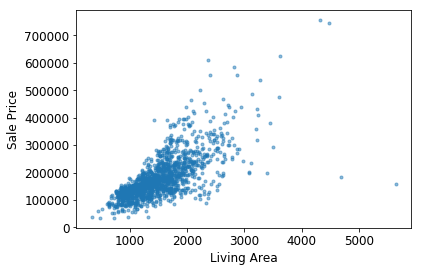

In [432]:
plt.plot( df['GrLivArea'], SalePrice, '.', alpha=.5);
plt.xlabel('Living Area'); plt.ylabel('Sale Price'); 

## Distribution des prix de vente

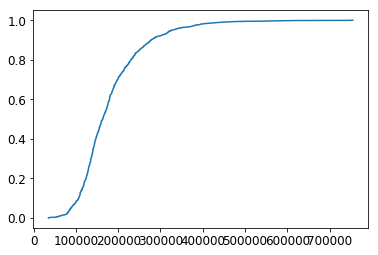

In [434]:
xFRep = sorted( SalePrice )
yFRep = np.linspace( 0, 1, len(SalePrice) )

plt.plot( xFRep, yFRep );

## Graphe écart-type vs nombre de valeurs, pour chaque catégorie
On peut essayer de faire un graphique écart-type VS nombre d'individus pour chaque sous groupe correspondant à une propriété, par exemple 'Pool Area' = 576


In [436]:
allN, allstd, allval = [], [], []
for col in df.columns:
        
    values = df[col].unique()
    if len(values)>30: continue
        
    for val in values:
        if type(val) == float and np.isnan( val ): continue
        prices = SalePrice[ df[col]==val ]
        N = prices.shape[0]
        if N < 10: continue
        std = prices.std()

        allN.append( N )
        allstd.append( std )
        allval.append( (col, val) )

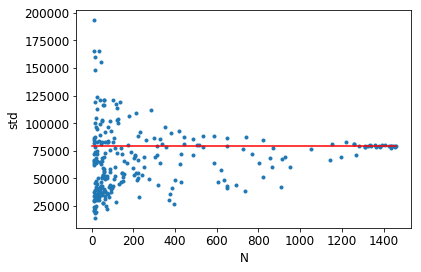

In [437]:
plt.plot(allN, allstd, '.')
plt.plot([0, maxN], [maxstd, maxstd], 'r-')

plt.xlabel('N'); plt.ylabel('std');

la ligne rouge est l'écart-type de l'ensemble des données.

La dispersion de l'écart-type augmente quand la taille de l'échantillon diminue.
On peut comparer cette dispersion avec une distribution aléatoire, soit de façon théorique, ou bien en tirant au hazard des valeurs dans les données

## Dispersion de l'écart-type

In [445]:
maxstd =  SalePrice.std()
maxN = df.shape[0]

#### De façon experimentale :

In [448]:
n_span = range( 20, maxN, int(maxN/30) )
n_random, std_random = [], []
for N in n_span:
    echantillon = []
    for k in range( 200 ):
        V = np.random.choice(SalePrice, size=int(N), replace=True)
        echantillon.append(  V.std() )
        
    n_random.append( N )
    std_random.append( np.std( echantillon ) )
    
std_random = np.array(std_random)

#### De façon théorique :

In [461]:
# https://fr.wikipedia.org/wiki/Estimateur_(statistique)#Estimateur_de_la_variance_de_Y
# Pour une distribution gaussienne
# Avec ou sans remise

n_span_theo = np.linspace(20, maxN, 100)
std_std_theo_sans = np.sqrt(1/n_span_theo )*maxstd * (maxN - n_span_theo)/(maxN-1)
std_std_theo_avec = np.sqrt(1/n_span_theo )*maxstd 

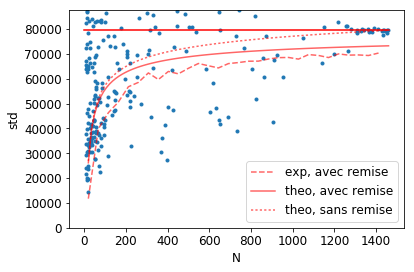

In [462]:
plt.plot(allN, allstd, '.')
plt.plot([0, maxN], [maxstd, maxstd], 'r-')

plt.plot(n_random, maxstd - 3*std_random,'--r', alpha=.6, label='exp, avec remise')
plt.plot(n_span_theo, maxstd - 3*std_std_theo_avec,'-r', alpha=.6, label='theo, avec remise')
plt.plot(n_span_theo, maxstd - 3*std_std_theo_sans,':r', alpha=.6, label='theo, sans remise')

plt.xlabel('N'); plt.ylabel('std');
plt.ylim([0, maxstd*1.101]); plt.legend();

La courbe théorique correspond bien à la courbe issus des données 'avec remise'.

Rq: Sans remise la courbe théorique devient égale à std_max, ce qui se comprend, c'est le même échantillon, 
mais pour la suite, ce n'est pas le mieux (norme) .. moins sensible aux valeurs abérrantes...

Les meillieurs prédicteurs sont ceux, à priori, en bas au millieu: un faible écart-type avec un nombre raisonable de valeurs... 

on peut faire une transformation des coordonnées en normant l'écart-type par la valeur théorique

In [452]:
allN = np.array(allN)
allstd =  np.array(allstd)

std_std_theo = np.sqrt(1/allN )*maxstd # * (maxN - allN)/(maxN-1) # avec/sans remise

allstd_star = (maxstd - allstd)/std_std_theo

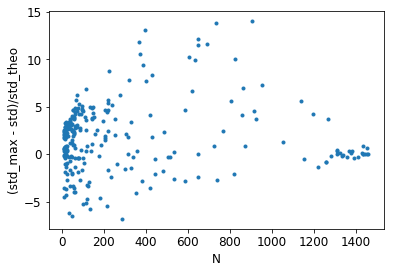

In [453]:
plt.plot(allN, allstd_star, '.')
plt.xlabel('N'); plt.ylabel('(std_max - std)/std_theo');

Les prédicteurs d'intérets sont maintenant en haut, au millieu. 

Et si on regarde les variables en tête :

In [393]:
val_sorted = sorted( zip( allval, allstd_star ), key=lambda x:x[1], reverse=True    )
print( val_sorted[:10] )

[(('ExterQual', 'TA'), 14.007760359945708), (('KitchenQual', 'TA'), 13.836974828708783), (('OverallQual', 5), 13.126108518874089), (('FullBath', 1), 12.155817661076108), (('GarageCars', 1), 11.855590371064697), (('Fireplaces', 0), 11.590263274207402), (('BsmtQual', 'TA'), 11.5313433868952), (('OverallQual', 6), 10.553468687281514), (('GarageFinish', 'Unf'), 10.200013916630201), (('GarageCars', 2), 10.054291163268656)]


### Visualisation des catégories :

ExterQual TA


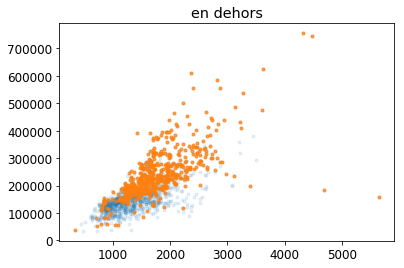

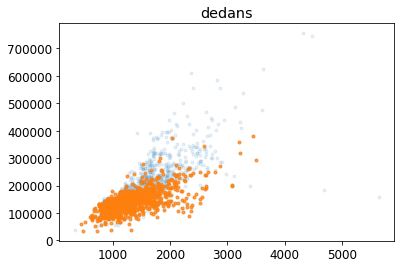

In [465]:
plt.plot( df['GrLivArea'], SalePrice, '.', alpha=.1)

k = 0
col, val = val_sorted[k][0]
plt.plot( df[ df[col]!=val ]['GrLivArea'], SalePrice[ df[col]!=val ], '.',  alpha=.7); 
plt.title('en dehors');

plt.figure();
plt.plot( df['GrLivArea'], SalePrice, '.', alpha=.1)
plt.plot( df[ df[col]==val ]['GrLivArea'], SalePrice[ df[col]==val ], '.',  alpha=.7); 
plt.title('dedans')

print( col, val )

_Remarque:_ si il y a une corrélation linéaire, typiquement avec la surface, alors l'écart-type va être important.
Il y a un problème de regression (linéaire), en plus du choix des prédicteurs donnant la variance la plus faible. 


Aussi un indicateur seul n'est pas suffisant... on peut faire des combinaissons, c'est-à-dire construire un arbre... prendre le meilieur et refaire le raisonement sur les deux sous ensembles formés


On peut aussi rechercher le critère qui minimise la variance des **deux** sous groupes crées (== et !=)
On retrouve la formule (9.13) page 307 du livre (ESL) :

In [456]:
std_12, colval = [], []
for col in df.columns:
        
    values = df[col].unique()
    if len(values)>30: continue
        
    for val in values:
        if type(val) == float and np.isnan( val ): continue
        prices_in = SalePrice[ df[col]==val ]
        prices_out = SalePrice[ df[col]!=val ]
        
        N_in = prices_in.shape[0]
        N_out = prices_out.shape[0]
        
        if N_in < 10 or N_out<10 : continue
            
    
        std_12.append( prices_in.std()*N_in + prices_out.std()*N_out )
        colval.append( (col, val) )

In [457]:
val12_sorted = sorted( zip( colval, std_12 ), key=lambda x:x[1], reverse=False    )
print( val12_sorted[:10] )

[(('ExterQual', 'TA'), 87786700.513001651), (('GarageCars', 3), 88437786.797516122), (('KitchenQual', 'TA'), 92432400.794978216), (('BsmtQual', 'Ex'), 94302580.949604869), (('FullBath', 1), 94343823.628845215), (('Foundation', 'PConc'), 97074281.948343948), (('Fireplaces', 0), 97498756.921874836), (('KitchenQual', 'Ex'), 97988683.269634604), (('BsmtQual', 'TA'), 98589203.222694606), (('HeatingQC', 'Ex'), 100889998.40070814)]


GarageCars 3


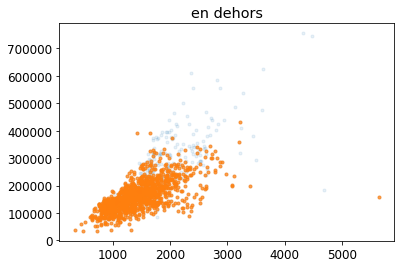

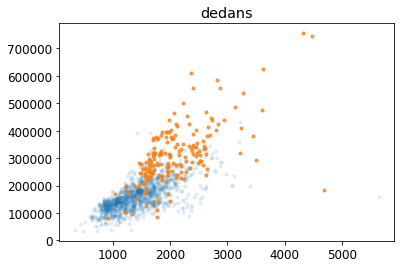

In [459]:
plt.plot( df['GrLivArea'], SalePrice, '.', alpha=.1)

k = 1
col, val = val12_sorted[k][0]
plt.plot( df[ df[col]!=val ]['GrLivArea'], SalePrice[ df[col]!=val ], '.',  alpha=.7); 
plt.title('en dehors')

plt.figure();
plt.title('dedans')
plt.plot( df['GrLivArea'], SalePrice, '.', alpha=.1)
plt.plot( df[ df[col]==val ]['GrLivArea'], SalePrice[ df[col]==val ], '.',  alpha=.7); 

print( col, val )

On retrouve grosso-modo les mêmes: ('ExterQual', 'TA'), ('KitchenQual', 'TA'), ('FullBath', 1)...

## Algorithme de construction d'arbre
doc
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

Besoin pour Sciki d'encoder les features...
https://datascience.stackexchange.com/questions/5226/strings-as-features-in-decision-tree-random-forest

à suivre...


In [418]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

im = preprocessing.Imputer(strategy='mean', axis=1)
le = preprocessing.LabelEncoder()
enc = preprocessing.OneHotEncoder()

In [421]:
process = []
process.append( ('missing' , preprocessing.Imputer(strategy='mean', axis=1)) )
process.append( ('label' , preprocessing.LabelEncoder() ) )

pipeline = Pipeline(process)

In [426]:
im = preprocessing.Imputer(strategy='mean', axis=1)